# Imports

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib import cm
import seaborn as sns
from pathlib import Path
sns.set_style('darkgrid', {'legend.frameon':True})

In [2]:
import os
import sys
sys.path.append(str(Path(os.getcwd()).parent / 'middleware/middleware'))
from src.helpers import correct_encoding

# Load df

In [4]:
df = pd.read_csv('data/exports/export_CR_PETCT-01012016.csv', sep='\t')
df['COMPTE_RENDU'] = df['COMPTE_RENDU'].apply(correct_encoding)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52353 entries, 0 to 52352
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   NUMERO_EXAMEN   52353 non-null  object
 1   TYPE_EXAMEN     52353 non-null  object
 2   LIBELLE_EXAMEN  52353 non-null  object
 3   NUM_SALLE       52353 non-null  object
 4   DATE_EXAMEN     52353 non-null  object
 5   HEURE_EXAMEN    52353 non-null  object
 6   COMPTE_RENDU    50147 non-null  object
dtypes: object(7)
memory usage: 2.8+ MB


,NUMERO_EXAMEN,TYPE_EXAMEN,LIBELLE_EXAMEN,NUM_SALLE,DATE_EXAMEN,HEURE_EXAMEN,COMPTE_RENDU
0,A10836454533,MN,TEP CORPS ENTIER,MBPET1,04/01/16,08:01,Installation répertoriée sous le n° M540008 Au...
1,A10844655173,MN,TEP CORPS ENTIER,MBPET1,04/01/16,14:16,Installation répertoriée sous le n° M540008 Au...
2,A10844655173,MN,TEP CORPS ENTIER,MBPET1,04/01/16,14:16,NaN
3,A10887608918,MN,TEP CORPS ENTIER,MBPET1,04/01/16,14:52,Installation répertoriée sous le n° M540008 Au...
4,A10886207618,MN,TEP CORPS ENTIER,MBPET1,04/01/16,10:31,Installation répertoriée sous le n° M540008 Au...


# Delete empties CR

In [3]:
df = df.dropna(subset=['COMPTE_RENDU'])
df.info()

NameError: name 'df' is not defined

# Delete duplicates CR

In [6]:
df = df.drop_duplicates(subset=['COMPTE_RENDU'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43907 entries, 0 to 52350
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   NUMERO_EXAMEN   43907 non-null  object
 1   TYPE_EXAMEN     43907 non-null  object
 2   LIBELLE_EXAMEN  43907 non-null  object
 3   NUM_SALLE       43907 non-null  object
 4   DATE_EXAMEN     43907 non-null  object
 5   HEURE_EXAMEN    43907 non-null  object
 6   COMPTE_RENDU    43906 non-null  object
dtypes: object(7)
memory usage: 2.7+ MB


# Remove unwanteds LIBELLE

In [7]:
df.describe()

,NUMERO_EXAMEN,TYPE_EXAMEN,LIBELLE_EXAMEN,NUM_SALLE,DATE_EXAMEN,HEURE_EXAMEN,COMPTE_RENDU
count,43907,43907,43907,43907,43907,43907,43906
unique,43668,2,33,7,1245,688,43906
top,A11244654751,MN,TEP CORPS ENTIER,MBPET2,22/01/20,07:54,Installation répertoriée sous le n° M540008 Au...
freq,3,43906,35591,12090,51,134,1


In [8]:
for tag_to_delete in ['PANNE DE MACHINE', 'PAS D\'EXAMEN, PAS DE PRODUITS', 'EXAMEN ANNULE', 'PAS VENU', 'VENU, NON REALISE']:
    df = df.drop(index=df[df['LIBELLE_EXAMEN'] == tag_to_delete].index)
df.describe()

,NUMERO_EXAMEN,TYPE_EXAMEN,LIBELLE_EXAMEN,NUM_SALLE,DATE_EXAMEN,HEURE_EXAMEN,COMPTE_RENDU
count,43373,43373,43373,43373,43373,43373,43372
unique,43138,2,28,7,1245,685,43372
top,A11244654751,MN,TEP CORPS ENTIER,MBPET2,10/03/20,07:54,Installation répertoriée sous le n° M540008 Au...
freq,3,43372,35591,11955,51,132,1


# Remove duplicates NUMERO_EXAMEN

In [8]:
df['NUMERO_EXAMEN'].value_counts().value_counts()

1    42909
2      224
3        5
Name: NUMERO_EXAMEN, dtype: int64

In [9]:
df = df.drop_duplicates(subset=['NUMERO_EXAMEN'], keep=False)

In [9]:
df['LIBELLE_EXAMEN'].value_counts()

TEP CORPS ENTIER            35590
TEP DOPA                     2119
TEP CERVEAU                  1901
TEP CHOLINE                  1182
TEP  CHOLINE                  807
TEP AUTRE                     405
TEP DOTATOC                   376
TEP ORL                       334
TEP PELVIS                    265
TEP PSMA                      142
TEP NODULE                     84
TEP CERVEAU MAF                38
TEP MEMBRES INFERIEURS         33
TEP FNA                        23
TEP RADIOTHERAPIE              23
TEP CERVEAU Piramal            17
TEP PYL PSMA                   11
TEP DOTAMIR                     5
CONSULTATION MN                 4
TEP DOTA RIV                    3
TEP ACQ DYNAMIQUE               2
TEP CAPRI                       2
TEP CORPS ENTIER FES            1
TEP CERVEAU PRECOCE AZET        1
INJ TEP                         1
TEP CERVEAU TARDIF AZET         1
TEP DOTATOC RIV                 1
TEP DOPA RIV                    1
Name: LIBELLE_EXAMEN, dtype: int64

# Split DATE_EXAMEN

In [10]:
df['year'] = df['DATE_EXAMEN'].apply(lambda x: x.split('/')[-1])
df['month'] = df['DATE_EXAMEN'].apply(lambda x: x.split('/')[1])
df.head()

,NUMERO_EXAMEN,TYPE_EXAMEN,LIBELLE_EXAMEN,NUM_SALLE,DATE_EXAMEN,HEURE_EXAMEN,COMPTE_RENDU,year,month
0,A10836454533,MN,TEP CORPS ENTIER,MBPET1,04/01/16,08:01,Installation répertoriée sous le n° M540008 Au...,16,01
3,A10887608918,MN,TEP CORPS ENTIER,MBPET1,04/01/16,14:52,Installation répertoriée sous le n° M540008 Au...,16,01
4,A10886207618,MN,TEP CORPS ENTIER,MBPET1,04/01/16,10:31,Installation répertoriée sous le n° M540008 Au...,16,01
5,A10887615070,MN,TEP CORPS ENTIER,MBPET1,04/01/16,16:16,Installation répertoriée sous le n° M540008 Au...,16,01
6,A10890051978,MN,TEP CORPS ENTIER,MBPET1,04/01/16,14:44,Installation répertoriée sous le n° M540008 Au...,16,01


# Dataviz

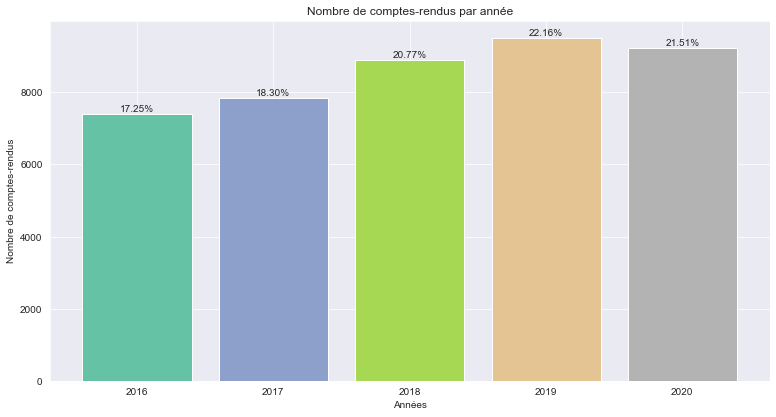

In [11]:
years = df['year'].value_counts().sort_index()
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
bar = ax.bar(
    [f'20{y}' for y in years.index],
    years.values,
    color=cm.Set2(np.linspace(0, 1, num=len(years))))
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height/len(df)*100:.2f}%', ha='center', va='bottom')

ax.set_title('Nombre de comptes-rendus par année')
ax.set_ylabel('Nombre de comptes-rendus')
ax.set_xlabel('Années')
plt.show()

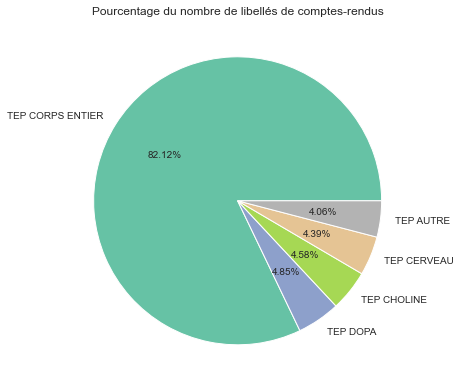

In [11]:
tags = df['LIBELLE_EXAMEN'].apply(lambda x: x.replace('  ', ' ')).value_counts().sort_values(ascending=False)

fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1])
ax.pie(
   list(tags[:4].values) + [tags[4:].values.sum()], 
    labels = list(tags[:4].index) + ['TEP AUTRE'],
    colors=cm.Set2(np.linspace(0, 1, num=len(years))),
    autopct='%1.2f%%')
ax.set_title('Pourcentage du nombre de libellés de comptes-rendus')

plt.show()

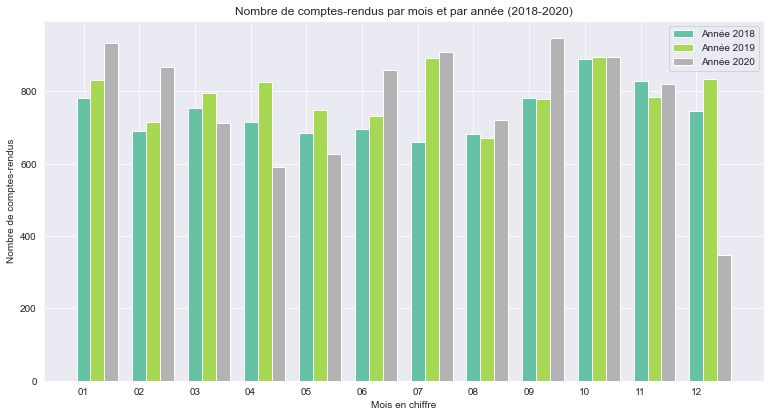

In [12]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])

months_years = df.groupby('month')['year']
years = df['year'].unique()[2:]
months = list(months_years.groups.keys())
colors = cm.Set2(np.linspace(0, 1, num=len(years)))
vc = months_years.value_counts()
X = np.arange(len(months))
bar_width = 1 / (len(years) + 1)

for i, y in enumerate(years):
    bar = ax.bar(
        X + i * bar_width,
        vc[:, y],
        color=colors[i],
        width = bar_width)

ax.set_title('Nombre de comptes-rendus par mois et par année (2018-2020)')
ax.set_ylabel('Nombre de comptes-rendus')
ax.set_xlabel('Mois en chiffre')
ax.set_xticks(X)
ax.set_xticklabels(months)
ax.legend(labels=[f'Année 20{y}' for y in years])

plt.show()

# Anonymisation

In [12]:
print("\n\n****************\n\n".join(list(df.head()['COMPTE_RENDU'])))

Installation répertoriée sous le n° M540008 Autorisation CODEP-STR-2014-030180					
BIOGRAPH DUO année 2002 N° identification 36159 de marque SIEMENS 
CC

Madame et Cher Consoeur, 

Nous vous remercions de nous avoir adressé Madame JACQUEL Chantal, née le 23/09/1959 (56 ans), pour la réalisation, le 04/01/2016, d'une tomoscintigraphie par émission de positons au FDG (Morpho-TEP). 

Contexte dans lequel l'étude est réalisée :
Bilan de réévaluation d'un adénocarcinome utérin traité par radio-chimiothérapie, curiethérapie et chirurgie en 2013, compliqué d'une fibrose rétro péritonéale traitée par sonde JJ. Précédent Morpho-TEP du 06/08/2015 : présence d'une lésion hypermétabolique de siège iliaque interne gauche (collection). 

Technique de l'examen :
Les acquisitions ont été débutées 65 minutes  après injection de 515 MBq de 18FDG. 
La glycémie lors de l'injection était de 94 mg/dl.
CTDI : 9,38 mGy - DLP : 850 mGy.cm
Injection de FLUROSEMIDE 10 mg (n° lot AY051)

Cet examen apporte les i

In [13]:
r_name = re.compile(r"(monsieur|madame|mademoiselle|mr|enfant|m\.|mlle)([\w\s]+),\s*née*\sle\s([0-9]{2}/[0-9]{2}/[0-9]{4})", re.I)
def anonymize(x):
    x = x.replace(u'\xa0', u' ')
    name = r_name.search(x)
    if not name:
        return 0
    lastname = " ".join([s for s in name.groups()[1].strip().split() if s.isupper()])
    lastnames = re.findall(rf"{lastname}", x, re.I)
    date = name.groups()[2]
    dates = re.findall(rf"{date}", x, re.I)
    if len(lastnames) != 1 or len(dates) != 1:
        print(f"{dates}, {name.groups()[1]}, {lastnames}")
        return 1
    x = x[:name.start(3)] + 'xxxx' + x[name.end(3):]
    x = x[:name.start(2)] + ' XXXX xxxx' + x[name.end(2):]
    return x
# print(df[df['COMPTE_RENDU'].apply(anonymize).isna()]['COMPTE_RENDU'].values[0])
df['cr_an'] = df['COMPTE_RENDU'].apply(anonymize)

['16/06/1950'],  PAYSANT Monique, ['PAYSANT', 'PAYSANT']
['01/07/1952'],  PETITJEAN Françoise, ['PETITJEAN', 'PETITJEAN']
['12/04/1954'],  MOHR Monique, ['MOHR', 'MOHR']
['16/02/1948'],  JUNG Monique, ['JUNG', 'JUNG']
['25/03/1956'],  KROLAK Jacques, ['KROLAK', 'KROLAK']
['28/11/1932'],  MATHIEU Robert, ['MATHIEU', 'MATHIEU']
['03/01/1963'],  ROCCHIA Joëlle, ['ROCCHIA', 'ROCCHIA']
['20/09/1937'],  GRUSELLE Georges, ['gruselle', 'GRUSELLE']
['03/03/1940'],  BORN René, ['BORN', 'BORN']
['31/07/1946'],  VOLL Danielle, ['VOLL', 'VOLL']
['13/07/1954'],  BRUCKER Martine, ['BRUCKER', 'BRUCKER']
['15/11/1928'],  PIERRON Josette, ['PIERRON', 'PIERRON']
['25/05/1987'],  MAUCOURT Bastien, ['MAUCOURT', 'MAUCOURT']
['15/09/1943'],  PIGNART Jean, ['PIGNART', 'PIGNART']
['26/03/1937'],  HAOURY Odile, ['HAOURY', 'HAOURY']
['19/12/1945'],  STARCK Yolande, ['STARCK', 'STARCK']
['04/09/1934'],  ROOSZ André, ['ROOSZ', 'ROOSZ']
['17/11/1950'],  ALVES Jose, ['ALVES', 'ALVES']
['16/04/1982'],  PASQUOTTO Emil

['27/01/1969'],  DJELLOULI Aïcha, ['DJELLOULI', 'DJELLOULI']
['27/07/1985'],  RAMAROMATAHOTRA Henriette, ['RAMAROMATAHOTRA', 'RAMAROMATAHOTRA']
['09/06/1951'],  PETIT Denis, ['PETIT', 'petit', 'petit']
['10/05/1950'],  ROBIN Georges, ['ROBIN', 'ROBIN']
['12/06/1955'],  FELTIN Joëlle, ['FELTIN', 'FELTIN']
['29/01/1957'],  CONTE Giuseppe, ['CONTE', 'Conte']
['21/09/1936'],  SCHLINQUER Marcel, ['SCHLINQUER', 'SCHLINQUER']
['25/07/1948'],  LIES Serge, ['LIES', 'LIES']
['22/09/1947'],  Marguerite BERAUD, ['BERAUD', 'BERAUD']
['01/09/1948'],  BERNARD Daniel, ['BERNARD', 'BERNARD']
['25/10/1972'],  BARRA Christine, ['BARRA', 'BARRA']
['20/06/1956'],  PIENTO Loreta, ['PIENTO', 'PIENTO']
['25/07/1935'],  PURCHLA Wladyslaw, ['PURCHLA', 'PURCHLA']
['29/03/1940'],  YUNG Edith, ['YUNG', 'YUNG']
['24/02/1961'],  GABURRO Frank, ['GABURRO', 'GABURRO']
['27/11/1957'],  HUBER Jean, ['HUBER', 'Huber']
['28/03/1942'],  LORENTZ Philippe, ['LORENTZ', 'LORENTZ']
['23/04/1950'],  BESOMBES Dominique, ['BESOMBE

['27/09/1957'],  FRIEDRICH Alain, ['FRIEDRICH', 'FRIEDRICH']
['28/05/1955'],  JAKUBOWSKI Ouisa, ['JAKUBOWSKI', 'JAKUBOWSKI']
['03/11/1956'],  DIAS Marie, ['DIAS', 'dias']
['28/10/1942'],  MATHIEU Yvan, ['MATHIEU', 'Mathieu']
['24/08/1938'],  PFRUNNER Marie, ['PFRUNNER', 'PFRUNNER']
['27/02/1949'],  LACOUR Ghislaine, ['LACOUR', 'LACOUR']
['17/04/1951'],  SIEGEL Jean Paul, ['SIEGEL', 'SIEGEL']
['03/08/1952'],  OSSOLA Martine, ['OSSOLA', 'OSSOLA']
['22/11/1941'],  HERGAT Roseline, ['HERGAT', 'HERGAT']
['12/09/1939'],  COQBLIN Eliane, ['COQBLIN', 'COQBLIN']
['31/10/1963'],  THOMASSIN Sylvie, ['THOMASSIN', 'THOMASSIN']
['17/10/1961'],  LEHNHART Régine, ['LEHNHART', 'LEHNHART']
['17/03/1944'],  PIERRE Liliane, ['PIERRE', 'PIERRE']
['03/04/1967'],  VOLKEN Marie, ['VOLKEN', 'VOLKEN']
['14/11/1980'],  BIDAUX Stephanie, ['BIDAUX', 'BIDAUX']
['23/09/1952'],  OHNIMUS Evelyne, ['OHNIMUS', 'OHNIMUS']
['05/09/1951'],  DISEURS Marie, ['DISEURS', 'DISEURS']
['22/02/1957'],  PERRIN Patrice, ['PERRIN', '

['09/03/1945'],  BOUZINA Djilali, ['Bouzina', 'BOUZINA']
['10/12/1955'],  HERREYE Marie Sophie, ['HERREYE', 'HERREYE']
['24/11/1944'],  KAUFFMANN Charles, ['KAUFFMANN', 'Kauffmann']
['24/01/1957'],  François KORSEC, ['KORSEC', 'KORSEC']
['30/06/1975'],  COLLARD Emmanuelle, ['COLLARD', 'COLLARD']
['24/05/1958'],  FILHO Catherine, ['FILHO', 'FILHO']
['08/07/1959'],    , ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 

['16/08/1942'],  AUER Nicole, ['AUER', 'AUER']
['03/01/1953'],  SADOWSKI Christian, ['SADOWSKI', 'SADOWSKI']
['17/06/1970'],  BASTIEN Florence, ['BASTIEN', 'BASTIEN']
['29/09/1948'],  WILHELM Alain, ['WILHELM', 'WILHELM']
['12/01/1945'],  DODINOT Jeannine, ['DODINOT', 'DODINOT']
['25/06/1942'],  LIS Marie Louise, ['LIS', 'lis']
['13/07/1966'],  REINNEIS Thierry, ['REINNEIS', 'REINNEIS']
['14/01/1969'],  EHL Jean Didier, ['EHL', 'EHL']
['12/06/1954'],  DIDIER Patrice, ['DIDIER', 'DIDIER']
['01/03/1942'],  CZWIKLINSKI Pierre, ['CZWIKLINSKI', 'CZWIKLINSKI']
['07/06/1975'],  BRETON Franck, ['BRETON', 'BRETON']
['10/05/1928'],  FORT Pierre, ['FORT', 'fort']
['28/05/1958'],  PILAREK Gerard, ['PILAREK', 'Pilarek']
['21/01/1952'],  PEDERSEN Claude, ['PEDERSEN', 'PEDERSEN']
['30/11/1954'],  CERVI Michèle, ['CERVI', 'cervi', 'cervi']
['11/05/1984'],  JEANPIERRE Marie, ['JEANPIERRE', 'JEANPIERRE']
['27/08/1938'],  LAURENT Jean, ['LAURENT', 'LAURENT']
['11/04/1964'],  BECKER Edith, ['BECKER', 'BEC

['11/12/1977'],  MACEL Cathie, ['macel', 'MACEL']
['08/06/1953'],  LEONE Marino, ['LEONE', 'LEONE']
['14/04/1975'],  OTIASHVILI Ekaterine, ['OTIASHVILI', 'OTIASHVILI']
['17/09/1948'],  CONGE Jean Jacques, ['CONGE', 'Conge']
['27/09/1956'],  SERT Dominique, ['SERT', 'SERT']
['30/11/1958'],  LALLEMENT Mireille, ['LALLEMENT', 'LALLEMENT']
['17/07/1947'],  CASTEX Lucien, ['CASTEX', 'CASTEX']
['03/07/1947'],  MUSQUIN Colette, ['MUSQUIN', 'MUSQUIN']
['20/11/1959'],  SO Jean, ['so', 'SO', 'so']
['08/02/1959'],  IANNAZZI Emmanuele, ['IANNAZZI', 'IANNAZZI']
['14/02/1971'],  EVRARD Didier, ['EVRARD', 'EVRARD', 'EVRARD']
['17/12/1961'],  LOR Dominique, ['LOR', 'lor']
['06/06/1952'],  BORR Carmen, ['borr', 'BORR']
['05/06/1963'],  GUITTONNEAU Ruben, ['GUITTONNEAU', 'GUITTONNEAU']
['08/08/1956'],  MICHEL Christian, ['MICHEL', 'Michel']
['15/10/1949'],  MATHIEU Jean, ['MATHIEU', 'Mathieu']
['22/02/1939', '22/02/1939'],  PARMENTIER Cécile, ['PARMENTIER', 'PARMENTIER']
['25/01/1942'],  CUNAT Anne, ['C

['15/03/1942'],  JAROCH Suzanne, ['JAROCH', 'JAROCH']
['27/10/1968'],  DI BITETTO Eric, ['DI BITETTO', 'DI BITETTO']
['10/05/1954'],  CHARBONNEL Alain, ['CHARBONNEL', 'CHARBONNEL']
['20/10/1958'],  NEUSCH Philippe, ['NEUSCH', 'NEUSCH']
['17/02/1950'],  GODET Etienne, ['GODET', 'GODET']
['12/02/1951'],  SUTTER Jean Luc, ['SUTTER', 'SUTTER']
['23/01/1951'],  SOUTTER Donat, ['SOUTTER', 'SOUTTER']
['12/03/1952'],  , ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',

['15/12/1951'],  FASSELLA Robert, ['FASSELLA', 'FASSELLA']
['10/08/1941'],  FERCHAUD Annie, ['FERCHAUD', 'FERCHAUD']
['06/06/1948'],  WILMOUTH Theodore, ['WILMOUTH', 'WILMOUTH']
['13/07/1939'],  AHRENS Dieter, ['AHRENS', 'AHRENS']
['15/11/1984'],  KIEFFER Marjorie, ['KIEFFER', 'KIEFFER']
['02/01/1966'],  GOEDERT Laurent, ['GOEDERT', 'GOEDERT']
['13/02/1994'],  ADAM Leonie, ['adam', 'ADAM']
['01/02/1963'],  FLAUSS Herve, ['FLAUSS', 'FLAUSS']
['16/11/1940'],  BOCQUEL Sylvette, ['BOCQUEL', 'BOCQUEL']
['16/10/1954'],  BOBADILLA Manuel, ['BOBADILLA', 'BOBADILLA']
['12/06/1984'],  HANOTIN Nadege, ['HANOTIN', 'HANOTIN']
['24/07/1981'],  BEAUSEROY Delphine, ['BEAUSEROY', 'BEAUSEROY']
['18/11/1934'],  FREYERMUTH Robert, ['Freyermuth', 'FREYERMUTH']
['20/03/1966'],  PIERRE Marie Christine, ['PIERRE', 'PIERRE']
['09/01/1955'],  PUTZ Gerard, ['PUTZ', 'PUTZ']
['30/12/1964'],  GARDEUX Eric, ['GARDEUX', 'GARDEUX']
['24/08/1950'],  KOWNATOR Serge, ['KOWNATOR', 'KOWNATOR']
['22/10/2013'],  MINA Louise,

# Plot anonymisation

In [14]:
missings = []
founded = []
group_lens = []

dfgb_year = df.groupby('year')
years = list(dfgb_year.groups.keys())

for k in years:
    group = dfgb_year.get_group(k)
    group_lens.append(len(group))
    missings.append(len(group[group['cr_an'] == 0]))    
    founded.append(len(group[group['cr_an'] == 1]))

group_lens = np.array(group_lens)    
missings = np.array(missings)
founded = np.array(founded)
years = [f'20{y}' for y in years]

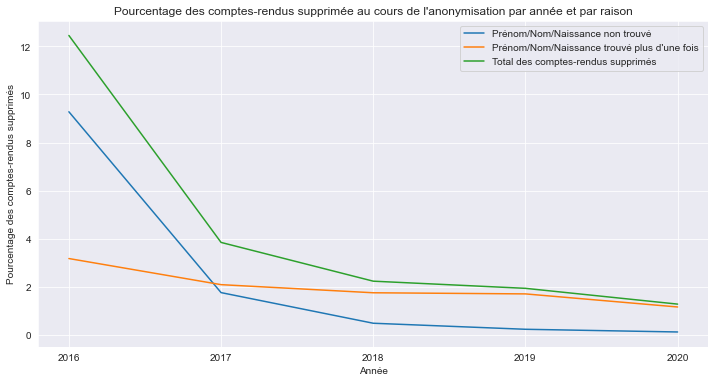

In [15]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(years, missings / group_lens * 100, label='Prénom/Nom/Naissance non trouvé')
ax.plot(years, founded / group_lens * 100, label='Prénom/Nom/Naissance trouvé plus d\'une fois')
ax.plot(years, (missings + founded) / group_lens * 100, label='Total des comptes-rendus supprimés')
plt.grid()
ax.set(xlabel='Année', ylabel='Pourcentage des comptes-rendus supprimés',
       title='Pourcentage des comptes-rendus supprimée au cours de l\'anonymisation par année et par raison')
ax.grid()
ax.legend()  
plt.show()

In [16]:
print("\n\n****************\n\n".join([str(cr) for cr in list(df.head()['cr_an'])]))

Installation répertoriée sous le n° M540008 Autorisation CODEP-STR-2014-030180					
BIOGRAPH DUO année 2002 N° identification 36159 de marque SIEMENS 
CC

Madame et Cher Consoeur, 

Nous vous remercions de nous avoir adressé Madame XXXX xxxx, née le xxxx (56 ans), pour la réalisation, le 04/01/2016, d'une tomoscintigraphie par émission de positons au FDG (Morpho-TEP). 

Contexte dans lequel l'étude est réalisée :
Bilan de réévaluation d'un adénocarcinome utérin traité par radio-chimiothérapie, curiethérapie et chirurgie en 2013, compliqué d'une fibrose rétro péritonéale traitée par sonde JJ. Précédent Morpho-TEP du 06/08/2015 : présence d'une lésion hypermétabolique de siège iliaque interne gauche (collection). 

Technique de l'examen :
Les acquisitions ont été débutées 65 minutes  après injection de 515 MBq de 18FDG. 
La glycémie lors de l'injection était de 94 mg/dl.
CTDI : 9,38 mGy - DLP : 850 mGy.cm
Injection de FLUROSEMIDE 10 mg (n° lot AY051)

Cet examen apporte les informations 

In [17]:
sample = df.drop(df[df['cr_an'] == 0].index)
print(f"{len(sample)}, {len(df)}, {len(df) - len(sample)}, {(len(df) - len(sample)) / len(df) * 100:.3f}, {len(sample) / len(df) * 100:.3f}")

42007, 42908, 901, 2.100, 97.900


In [18]:
sample = sample.drop(sample[sample['cr_an'] == 1].index)
print(f"{len(sample)}, {len(df)}, {len(df) - len(sample)}, {(len(df) - len(sample)) / len(df) * 100:.3f}, {len(sample) / len(df) * 100:.3f}")

41183, 42908, 1725, 4.020, 95.980


In [19]:
sample[sample['cr_an'] == '1']

,NUMERO_EXAMEN,TYPE_EXAMEN,LIBELLE_EXAMEN,NUM_SALLE,DATE_EXAMEN,HEURE_EXAMEN,COMPTE_RENDU,year,month,cr_an


In [20]:
sample.to_csv('data/exports/export_CR_PETCT-01012016_an.csv', '\t', index=False)